# Face Identification with VGGFace2 model

In [2]:
from numpy import expand_dims
from matplotlib import pyplot
from PIL import Image
from numpy import asarray
from mtcnn.mtcnn import MTCNN
from keras_vggface.vggface import VGGFace
from keras_vggface.utils import preprocess_input
from keras_vggface.utils import decode_predictions

/Users/meetkumarpatel/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


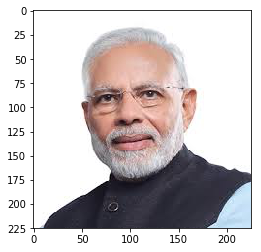

In [3]:
# load original image of the User
image = pyplot.imread('test.jpg')

# plot the extracted face
pyplot.imshow(image)
# show the plot
pyplot.show()

### Step 1: Face Detection to extract the face from the image

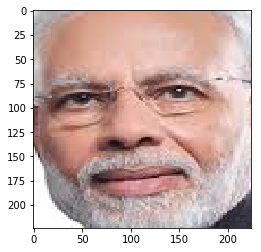

In [20]:
# face detection with a vggface2 model
# extract a single face from a given photograph
def extract_face(filename, required_size=(224, 224)):
	# load image from file
	pixels = pyplot.imread(filename)
	# create the detector, using default weights
	detector = MTCNN()
	# detect faces in the image
	results = detector.detect_faces(pixels)
	# extract the bounding box from the first face
	x1, y1, width, height = results[0]['box']
	x2, y2 = x1 + width, y1 + height
	# extract the face
	face = pixels[y1:y2, x1:x2]
	# resize pixels to the model size
	image = Image.fromarray(face)
	image = image.resize(required_size)
	face_array = asarray(image)
	return face_array


# load the photo and extract the face
pixels = extract_face('test.jpg')
# plot the extracted face
pyplot.imshow(pixels)
# show the plot
pyplot.show()

### Step 2: Face Identification

In [21]:
# convert one face into samples
pixels = pixels.astype('float32')
samples = expand_dims(pixels, axis=0)
# prepare the face for the model
samples = preprocess_input(samples, version=2)

In [22]:
# create a vggface model
model = VGGFace(model='resnet50')
# perform prediction
yhat = model.predict(samples)
# convert prediction into names
results = decode_predictions(yhat)
# display most likely results
for result in results[0]:
	print('%s: %.3f%%' % (result[0], result[1]*100))

b' Narendra_Modi': 96.523%
b' Ismail_Haniyeh': 0.645%
b' Sushil_Koirala': 0.291%
b' Ali_Akbar_Salehi': 0.131%
b' Ashraf_Ghani': 0.117%
